In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [4]:
## Import advertisting dataset
boston = pd.read_csv('..\..\datasets\Boston.csv', index_col='Unnamed: 0')
display(boston)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Will perform SLR without packages
- Predictor: lstat
- Response: medv

In [5]:
## Isolate onle needed variables
lstat_medv_df = boston.loc[:, ['lstat', 'medv']]

## Obtain Averages for predictor and response variables

x_bar = boston.lstat.mean()
print(f'x_bar: {x_bar}')
y_bar = boston.medv.mean()
print(f'y_bar: {y_bar}')

x_bar: 12.653063241106722
y_bar: 22.532806324110677


In [6]:
## Calculate the deviations of each data point from the mean for both X and Y

lstat_medv_df['x_dev'] = lstat_medv_df.lstat - x_bar
lstat_medv_df['y_dev'] = lstat_medv_df.medv - y_bar

display(lstat_medv_df)

,lstat,medv,x_dev,y_dev
1,4.98,24.0,-7.673063,1.467194
2,9.14,21.6,-3.513063,-0.932806
3,4.03,34.7,-8.623063,12.167194
4,2.94,33.4,-9.713063,10.867194
5,5.33,36.2,-7.323063,13.667194
...,...,...,...,...
502,9.67,22.4,-2.983063,-0.132806
503,9.08,20.6,-3.573063,-1.932806
504,5.64,23.9,-7.013063,1.367194
505,6.48,22.0,-6.173063,-0.532806


In [7]:
## Calculate the coefficient b1 using the deviations from the above cell
b1 = sum(lstat_medv_df.x_dev*lstat_medv_df.y_dev)/sum(lstat_medv_df.x_dev**2)

## Calculate the coefficint b0 using b1 and the sample means
b0 = y_bar - b1*x_bar

print(f'beta1 = {b1}')
print(f'beta0 = {b0}')

beta1 = -0.9500493537579907
beta0 = 34.5538408793831


In [8]:
## Plot the regression line using plotly
## trendline arguement passed into plotly for ease of use. If you hover over the trendline you will see it is the same estimates as calculated above

fig = px.scatter(lstat_medv_df, x="lstat", y="medv", trendline='ols')

fig.show()

In [9]:
## Now we must assess the accuracy of our estimates
## First, calculate the Residual Sum of Squares from our new estimates

lstat_medv_df['y_hat'] = lstat_medv_df.lstat*b1 + b0
lstat_medv_df['resid_sq'] = (lstat_medv_df.medv - lstat_medv_df.y_hat)**2

display(lstat_medv_df)

rss = lstat_medv_df.resid_sq.sum()

print(f'RSS: {rss}')

,lstat,medv,x_dev,y_dev,y_hat,resid_sq
1,4.98,24.0,-7.673063,1.467194,29.822595,33.902614
2,9.14,21.6,-3.513063,-0.932806,25.870390,18.236229
3,4.03,34.7,-8.623063,12.167194,30.725142,15.799496
4,2.94,33.4,-9.713063,10.867194,31.760696,2.687318
5,5.33,36.2,-7.323063,13.667194,29.490078,45.023056
...,...,...,...,...,...,...
502,9.67,22.4,-2.983063,-0.132806,25.366864,8.802280
503,9.08,20.6,-3.573063,-1.932806,25.927393,28.381113
504,5.64,23.9,-7.013063,1.367194,29.195563,28.042982
505,6.48,22.0,-6.173063,-0.532806,28.397521,40.928276


RSS: 19472.38141832644


In [10]:
## Use RSS to calculate the Residual Standard Error Squared (Will be used in our SE calculations for b0 and b1)

rse_sq = rss/(len(lstat_medv_df) - 2)
print(f"RSE Squared: {rse_sq}")

RSE Squared: 38.63567741731437


In [11]:
## Calculation of the Standard Error for the coefficient b0
se_b0 = np.sqrt(rse_sq*((1/len(lstat_medv_df))+(x_bar**2/sum(lstat_medv_df.x_dev**2))))
print(f'Standard Error b0: {se_b0}')

## Calculation of the Standard Error for the coefficient b1
se_b1 = np.sqrt(rse_sq/sum(lstat_medv_df.x_dev**2))
print(f'Standard Error b1: {se_b1}')

Standard Error b0: 0.5626273549884331
Standard Error b1: 0.03873341621263942


In [12]:
## Construct a two tailed 95% Confidence Interval for each of the coefficients
b0_ci = [b0 - (1.97*se_b0), b0 + (1.97*se_b0)]
print(f'CI for b0: {b0_ci}')

b1_ci = [b1 - (1.97*se_b1), b1 + (1.97*se_b1)]
print(f'CI for b1: {b1_ci}')

CI for b0: [33.44546499005589, 35.662216768710316]
CI for b1: [-1.0263541836968904, -0.8737445238190911]


In [13]:
## Construct a model utility test to determine whether each coefficient is statistically significant (!= 0)

## b0
t_b0 = (b0 - 0)/se_b0
print(f't-critical value for b0: {t_b0}')

## b1
t_b1 = (b1 - 0)/se_b1
print(f't-critical value for b1: {t_b1}')
print('----------------------')
print('For b0, with a t-ctirical value of 61.42 we reject the null hypothesis at the alpha level .05 because the p-value associated is <0.00001. The coefficient b0 is significant')
print('For b1, with a t-ctirical value of -24.53 we reject the null hypothesis at the alpha level .05 because the p-value associated is <0.00001. The coefficient b0 is significant')

t-critical value for b0: 61.41514551864171
t-critical value for b1: -24.527899851187726
----------------------
For b0, with a t-ctirical value of 61.42 we reject the null hypothesis at the alpha level .05 because the p-value associated is <0.00001. The coefficient b0 is significant
For b1, with a t-ctirical value of -24.53 we reject the null hypothesis at the alpha level .05 because the p-value associated is <0.00001. The coefficient b0 is significant


In [14]:
## Now that we know our model coefficients are significant, it is time to assess the accuracy of the model as a whole.
## Calculate the residual standard error
## This was calculated before to calculate the standard error of our coefficients, however, it was squared.

rse = np.sqrt(rse_sq)

print(f'RSE: {rse}')
print('---------------------')
print(f'Even if the model were correct and the true values of the coefficients b0 and b1 were known, the prediction of medv using lstat would still be off by {rse} units on average')

RSE: 6.215760405398069
---------------------
Even if the model were correct and the true values of the coefficients b0 and b1 were known, the prediction of medv using lstat would still be off by 6.215760405398069 units on average


In [15]:
## Now we will calculate the R2 statistic
## Start by calculating Total Sum of Squares

tss = sum(lstat_medv_df.y_dev**2)

## Calculate r2 using TSS And RSS

r2 = (tss-rss)/tss

print(f'R2: {r2}')
print('---------------------')
print(f'{r2} of the variation in medv can be explained by lstat')


R2: 0.54414629758648
---------------------
0.54414629758648 of the variation in medv can be explained by lstat


## Now perform SLR with packages to confirm outputs

In [16]:
## Using statsmodels for ouptut

linear_model = ols('medv ~ lstat', data=lstat_medv_df).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           5.08e-88
Time:                        13:36:10   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

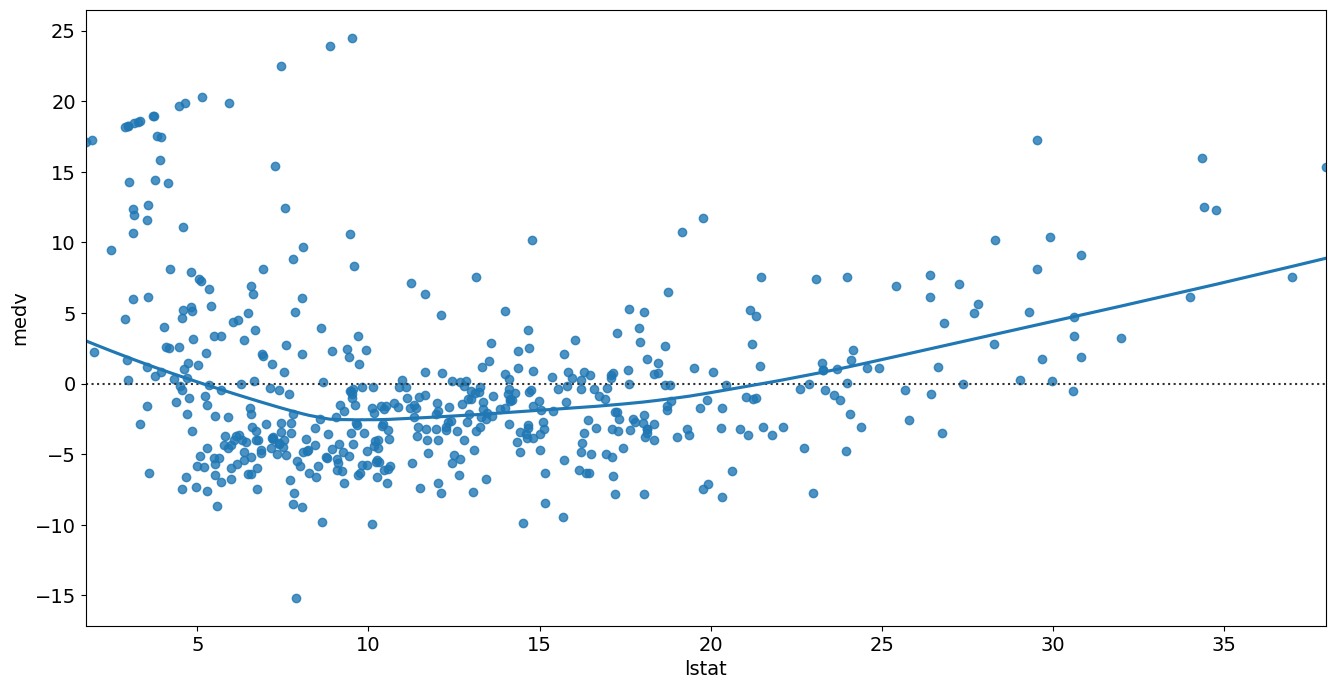

In [17]:
## Using seaborn for Residual Plot. Showing signs of non-linearity

sns.residplot(x='lstat', y='medv', data=lstat_medv_df, lowess=True)
plt.show()

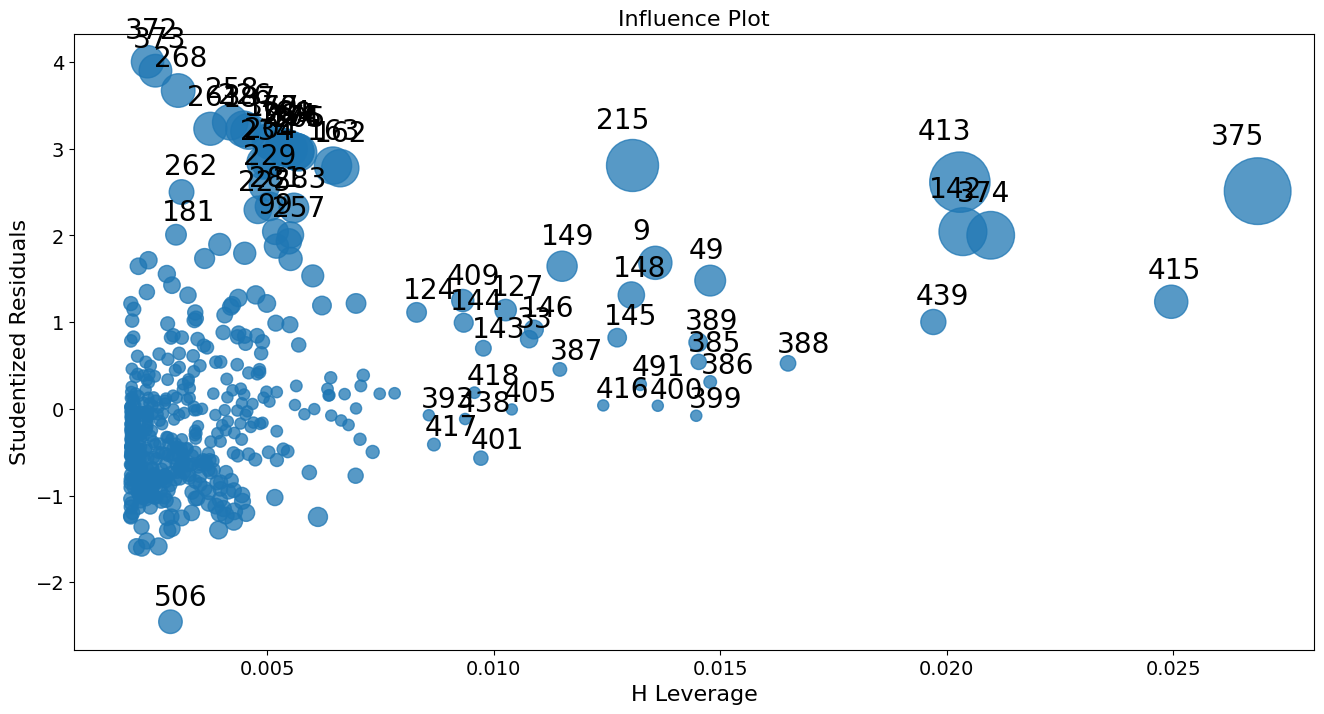

In [19]:
## Look for high leverage points

sm.graphics.influence_plot(linear_model, criterion="cooks")
plt.show()